In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score

#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Class 0: 283
Class 1: 17
Proportion: 16.6471 : 1


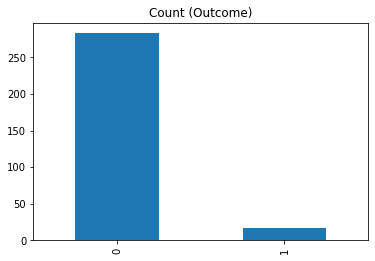

In [4]:
df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\Subject1.csv')
df = df.drop('Date', 1)
df = df.drop('Gender', 1)

target_count = df.Outcome.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

target_count.plot(kind='bar', title='Count (Outcome)');

In [5]:
# Class count
count_class_0, count_class_1 = df.Outcome.value_counts()

# Divide by class
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

Random under-sampling:
1    17
0    17
Name: Outcome, dtype: int64


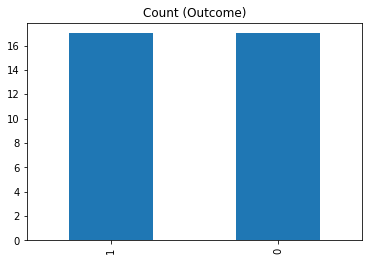

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');

Random over-sampling:
1    283
0    283
Name: Outcome, dtype: int64


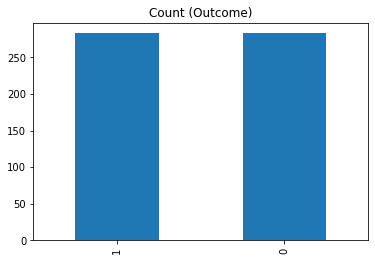

In [7]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');

In [8]:
from sklearn.model_selection import train_test_split

X_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.3,random_state=133)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

import numpy as np

predicted = model.predict(x_test)

print(np.mean(predicted == y_test))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for SVM is:",accuracy_score(y_test, predicted)*100)
print("\nSVM Classification Report\n")
print(classification_report(y_test,predicted))
print('\nSVM AUCROC is {:.3f}'.format(roc_auc_score(y_test,predicted)))


#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predicted)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)

0.9294117647058824
[[77 12]
 [ 0 81]]
Accuracy score for SVM is: 92.94117647058823

SVM Classification Report

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        89
           1       0.87      1.00      0.93        81

    accuracy                           0.93       170
   macro avg       0.94      0.93      0.93       170
weighted avg       0.94      0.93      0.93       170


SVM AUCROC is 0.933
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[77 12]
 [ 0 81]]
Accuracy :  0.9294117647058824
Sensitivity :  0.8651685393258427
Specificity :  1.0
Precision: 0.870968


In [10]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.2,random_state=1)

clf = SVC(kernel='linear', C = 0.1)

# fitting x samples and y classes 
clf.fit(x_train,y_train)
predictions1 = clf.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for SVM is:",accuracy_score(y_test, predictions1)*100)
svmacc=(accuracy_score(y_test, predictions1)*100)

print("\nSVM Classification Report\n")
print(classification_report(y_test,predictions1))
print('\nSVM AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions1)))

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predictions1)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions1)
print('Precision: %f' % precision)




Accuracy score for SVM is: 96.49122807017544

SVM Classification Report

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.94      1.00      0.97        60

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


SVM AUCROC is 0.963
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[50  4]
 [ 0 60]]
Accuracy :  0.9649122807017544
Sensitivity :  0.9259259259259259
Specificity :  1.0
Precision: 0.937500


In [11]:
#LOGISTICAL REGRESSION
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.30,random_state=0)

#Training and Predicting
#Import the Logisitcal Regression Library from SKLearn
from sklearn.linear_model import LogisticRegression

#create instance of logistical regression model called logmodel
logmodel=LogisticRegression()
#pass the data to the logmodel
logmodel.fit(x_train,y_train)

#make predictions with model on unseen test data
predictions = logmodel.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for Logistical Regression Model is:",accuracy_score(y_test, predictions)*100)


lracc=(accuracy_score(y_test, predictions)*100)
print("\nLogisitcal Regression Classification Report\n")
print(classification_report(y_test,predictions))
print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions1)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
roc_auc1

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for LOGISTICAL REGRESSION')
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc1)

plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))
print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions1)))


Accuracy score for Logistical Regression Model is: 97.6470588235294

Logisitcal Regression Classification Report

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        76
           1       0.96      1.00      0.98        94

    accuracy                           0.98       170
   macro avg       0.98      0.97      0.98       170
weighted avg       0.98      0.98      0.98       170


Logisitcal Regression AUCROC is 0.974
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[72  4]
 [ 0 94]]
Accuracy :  0.9764705882352941
Sensitivity :  0.9473684210526315
Specificity :  1.0
Precision: 0.959184


ValueError: Found input variables with inconsistent numbers of samples: [170, 114]

In [12]:
#DECISION TREE WITH GINI INDEX

#first 3 attributes are used for the x-axis
X = df_test_over.values[:, 0:4]
#attributes after number 3 are used for the y-axis
Y = df_test_over.values[:,5]

#import Accuracy Score to guage performance
from sklearn.metrics import accuracy_score

#Split the dataset using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 1)


#implement a depth of 5, with a minimum of 5 leaf nodes and a random state of 100
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1,
                               max_depth=5, min_samples_leaf=15)

#pass the training data to the decision tree
dt_clf_gini.fit(X_train, y_train)

#make prediction using unseen test data
y_pred_gini = dt_clf_gini.predict(X_test)

#methods used to show the performance metrics of the model
print("\nAccuracy Score for Desicion Tree Model using Gini Index is ", accuracy_score(y_test,y_pred_gini)*100 )

#list the performance metrics the model emanates
dtacc=(accuracy_score(y_test,y_pred_gini)*100)



print("\nDesicion Tree  Classification Report\n")
print(classification_report(y_test,y_pred_gini))



#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_gini)
print('Confusion Matrix for DT: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_gini)
print('Precision: %f' % precision)



Accuracy Score for Desicion Tree Model using Gini Index is  92.3529411764706

Desicion Tree  Classification Report

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92        80
         1.0       0.92      0.93      0.93        90

    accuracy                           0.92       170
   macro avg       0.92      0.92      0.92       170
weighted avg       0.92      0.92      0.92       170

Confusion Matrix for DT: 
 [[73  7]
 [ 6 84]]
Accuracy :  0.9235294117647059
Sensitivity :  0.9125
Specificity :  0.9333333333333333
Precision: 0.923077



dt AUCROC is 0.923


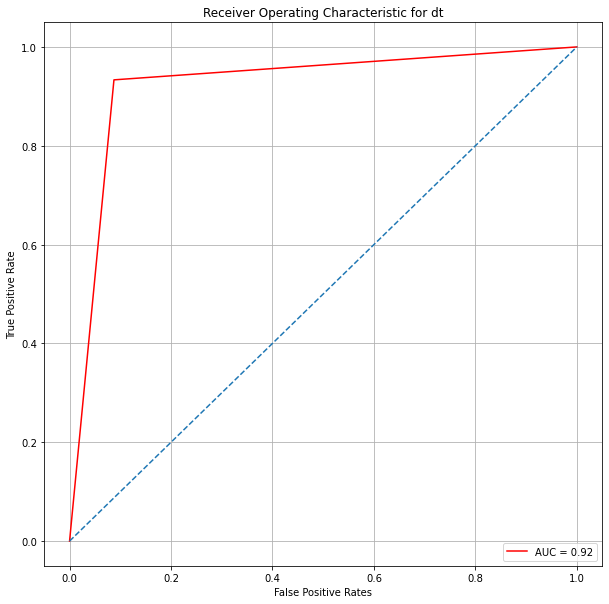

In [13]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_gini)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for dt')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\ndt AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_gini)))

In [14]:
#RANDOM FOREST

X = df_test_over.iloc[:, :3].values

#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier(criterion = "gini", random_state =1111,
                               max_depth=22, n_estimators = 11)

rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
rfacc=(accuracy_score(y_test,y_pred_class_rf)*100)

print('\nAccuracy Score for Random Forest Model is {:.3f}', rfacc)


print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))



#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_class_rf)
print('Confusion Matrix for DT: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_class_rf)
print('Precision: %f' % precision)


Accuracy Score for Random Forest Model is {:.3f} 90.0

Random Forest roc-auc measure is 0.943

Random Forest  Classification Report

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        87
           1       0.88      0.92      0.90        83

    accuracy                           0.90       170
   macro avg       0.90      0.90      0.90       170
weighted avg       0.90      0.90      0.90       170

Confusion Matrix for DT: 
 [[77 10]
 [ 7 76]]
Accuracy :  0.9
Sensitivity :  0.8850574712643678
Specificity :  0.9156626506024096
Precision: 0.883721



Logisitcal Regression AUCROC is 0.900


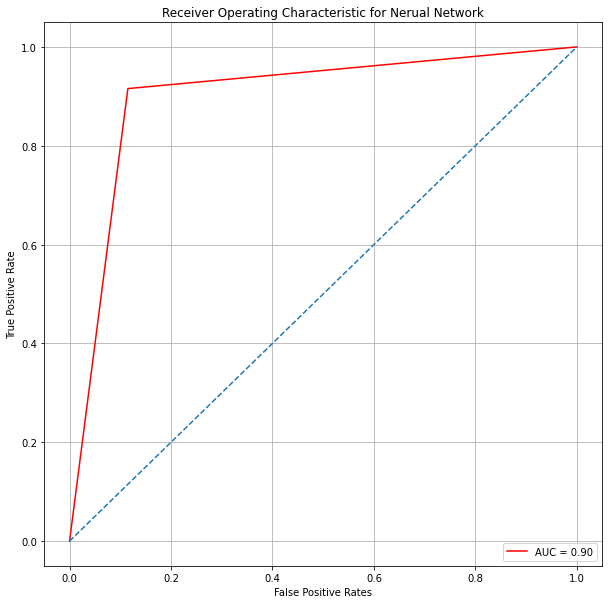

In [15]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_class_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_class_rf)))

In [16]:

#NEURAL NETWORK

X = df_test_over.iloc[:, :4].values
#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation
model_1 = Sequential([
    Dense(12, input_shape=(4,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .0025), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=700)

#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\n')
nnacc=(accuracy_score(y_test,y_pred_class_nn_1)*100)
print('\nAccuracy Score for Nerual Network is {:.3f}', nnacc)


print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_class_nn_1)))
print("\nNerual Network Classification Report\n")
print(classification_report(y_test,y_pred_class_nn_1))

W0811 19:36:55.506584 56608 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 19:36:55.520547 56608 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 19:36:55.522541 56608 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 19:36:55.572407 56608 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 19:36:55.581383 56608 deprecation_wrapper.py:119] From C:\Users\jamie\Anac


************Start of Nerual Netwrok Summary*********
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Train on 452 samples, validate on 114 samples
Epoch 1/700
452/452 [==============================] - 0s 349us/step - loss: 0.8537 - acc: 0.4668 - val_loss: 0.8451 - val_acc: 0.4298
Epoch 2/700
452/452 [==============================] - 0s 26us/step - loss: 0.8440 - acc: 0.4668 - val_loss: 0.8353 - val_acc: 0.4298
Epoch 3/700
452/452 [==============================] - 0s 24us/step - loss: 0.8348 - acc: 0.4712 - val_loss: 0.8258 - val_acc: 0.4737
Epoch 4/700
452/452 [==================

452/452 [==============================] - 0s 29us/step - loss: 0.6137 - acc: 0.7235 - val_loss: 0.6015 - val_acc: 0.7281
Epoch 57/700
452/452 [==============================] - 0s 24us/step - loss: 0.6113 - acc: 0.7235 - val_loss: 0.5993 - val_acc: 0.7281
Epoch 58/700
452/452 [==============================] - 0s 26us/step - loss: 0.6091 - acc: 0.7235 - val_loss: 0.5971 - val_acc: 0.8158
Epoch 59/700
452/452 [==============================] - 0s 24us/step - loss: 0.6068 - acc: 0.7788 - val_loss: 0.5949 - val_acc: 0.8158
Epoch 60/700
452/452 [==============================] - 0s 24us/step - loss: 0.6045 - acc: 0.7788 - val_loss: 0.5928 - val_acc: 0.8158
Epoch 61/700
452/452 [==============================] - 0s 24us/step - loss: 0.6023 - acc: 0.7788 - val_loss: 0.5907 - val_acc: 0.8158
Epoch 62/700
452/452 [==============================] - 0s 26us/step - loss: 0.6001 - acc: 0.7788 - val_loss: 0.5885 - val_acc: 0.8158
Epoch 63/700
452/452 [==============================] - 0s 24us/step

452/452 [==============================] - 0s 26us/step - loss: 0.4966 - acc: 0.8628 - val_loss: 0.4874 - val_acc: 0.9035
Epoch 117/700
452/452 [==============================] - 0s 26us/step - loss: 0.4950 - acc: 0.8783 - val_loss: 0.4858 - val_acc: 0.9035
Epoch 118/700
452/452 [==============================] - 0s 24us/step - loss: 0.4934 - acc: 0.8783 - val_loss: 0.4843 - val_acc: 0.9035
Epoch 119/700
452/452 [==============================] - 0s 24us/step - loss: 0.4919 - acc: 0.8783 - val_loss: 0.4827 - val_acc: 0.9035
Epoch 120/700
452/452 [==============================] - 0s 24us/step - loss: 0.4903 - acc: 0.8783 - val_loss: 0.4811 - val_acc: 0.9035
Epoch 121/700
452/452 [==============================] - 0s 22us/step - loss: 0.4887 - acc: 0.8783 - val_loss: 0.4796 - val_acc: 0.9035
Epoch 122/700
452/452 [==============================] - 0s 22us/step - loss: 0.4872 - acc: 0.8761 - val_loss: 0.4781 - val_acc: 0.9035
Epoch 123/700
452/452 [==============================] - 0s 24

452/452 [==============================] - 0s 26us/step - loss: 0.4178 - acc: 0.8850 - val_loss: 0.4077 - val_acc: 0.9123
Epoch 177/700
452/452 [==============================] - 0s 26us/step - loss: 0.4168 - acc: 0.8850 - val_loss: 0.4066 - val_acc: 0.9123
Epoch 178/700
452/452 [==============================] - 0s 24us/step - loss: 0.4157 - acc: 0.8850 - val_loss: 0.4054 - val_acc: 0.9123
Epoch 179/700
452/452 [==============================] - 0s 24us/step - loss: 0.4146 - acc: 0.8850 - val_loss: 0.4044 - val_acc: 0.9123
Epoch 180/700
452/452 [==============================] - 0s 26us/step - loss: 0.4135 - acc: 0.8850 - val_loss: 0.4032 - val_acc: 0.9123
Epoch 181/700
452/452 [==============================] - 0s 24us/step - loss: 0.4124 - acc: 0.8850 - val_loss: 0.4021 - val_acc: 0.9123
Epoch 182/700
452/452 [==============================] - 0s 22us/step - loss: 0.4113 - acc: 0.8850 - val_loss: 0.4010 - val_acc: 0.9123
Epoch 183/700
452/452 [==============================] - 0s 25

452/452 [==============================] - 0s 24us/step - loss: 0.3621 - acc: 0.8739 - val_loss: 0.3483 - val_acc: 0.8947
Epoch 237/700
452/452 [==============================] - 0s 26us/step - loss: 0.3614 - acc: 0.8739 - val_loss: 0.3475 - val_acc: 0.8947
Epoch 238/700
452/452 [==============================] - 0s 26us/step - loss: 0.3606 - acc: 0.8739 - val_loss: 0.3466 - val_acc: 0.8947
Epoch 239/700
452/452 [==============================] - 0s 26us/step - loss: 0.3598 - acc: 0.8739 - val_loss: 0.3458 - val_acc: 0.8947
Epoch 240/700
452/452 [==============================] - 0s 25us/step - loss: 0.3591 - acc: 0.8739 - val_loss: 0.3450 - val_acc: 0.8947
Epoch 241/700
452/452 [==============================] - 0s 24us/step - loss: 0.3584 - acc: 0.8739 - val_loss: 0.3441 - val_acc: 0.8947
Epoch 242/700
452/452 [==============================] - 0s 26us/step - loss: 0.3576 - acc: 0.8739 - val_loss: 0.3433 - val_acc: 0.8947
Epoch 243/700
452/452 [==============================] - 0s 24

452/452 [==============================] - 0s 27us/step - loss: 0.3216 - acc: 0.9027 - val_loss: 0.3047 - val_acc: 0.8947
Epoch 297/700
452/452 [==============================] - 0s 24us/step - loss: 0.3210 - acc: 0.9027 - val_loss: 0.3041 - val_acc: 0.8947
Epoch 298/700
452/452 [==============================] - 0s 24us/step - loss: 0.3204 - acc: 0.9027 - val_loss: 0.3035 - val_acc: 0.8947
Epoch 299/700
452/452 [==============================] - 0s 23us/step - loss: 0.3198 - acc: 0.9027 - val_loss: 0.3028 - val_acc: 0.8947
Epoch 300/700
452/452 [==============================] - 0s 26us/step - loss: 0.3193 - acc: 0.9027 - val_loss: 0.3022 - val_acc: 0.8947
Epoch 301/700
452/452 [==============================] - 0s 29us/step - loss: 0.3187 - acc: 0.9027 - val_loss: 0.3015 - val_acc: 0.8947
Epoch 302/700
452/452 [==============================] - 0s 31us/step - loss: 0.3181 - acc: 0.9027 - val_loss: 0.3009 - val_acc: 0.8947
Epoch 303/700
452/452 [==============================] - 0s 29

452/452 [==============================] - 0s 24us/step - loss: 0.2912 - acc: 0.9071 - val_loss: 0.2717 - val_acc: 0.9035
Epoch 357/700
452/452 [==============================] - 0s 26us/step - loss: 0.2908 - acc: 0.9071 - val_loss: 0.2712 - val_acc: 0.9035
Epoch 358/700
452/452 [==============================] - 0s 24us/step - loss: 0.2904 - acc: 0.9071 - val_loss: 0.2707 - val_acc: 0.9035
Epoch 359/700
452/452 [==============================] - 0s 24us/step - loss: 0.2900 - acc: 0.9071 - val_loss: 0.2702 - val_acc: 0.9035
Epoch 360/700
452/452 [==============================] - 0s 24us/step - loss: 0.2895 - acc: 0.9071 - val_loss: 0.2699 - val_acc: 0.9035
Epoch 361/700
452/452 [==============================] - 0s 26us/step - loss: 0.2892 - acc: 0.9071 - val_loss: 0.2694 - val_acc: 0.9035
Epoch 362/700
452/452 [==============================] - 0s 24us/step - loss: 0.2887 - acc: 0.9071 - val_loss: 0.2690 - val_acc: 0.9035
Epoch 363/700
452/452 [==============================] - 0s 23

452/452 [==============================] - 0s 22us/step - loss: 0.2679 - acc: 0.9071 - val_loss: 0.2483 - val_acc: 0.9035
Epoch 417/700
452/452 [==============================] - 0s 22us/step - loss: 0.2676 - acc: 0.9071 - val_loss: 0.2480 - val_acc: 0.9035
Epoch 418/700
452/452 [==============================] - 0s 24us/step - loss: 0.2673 - acc: 0.9071 - val_loss: 0.2477 - val_acc: 0.9035
Epoch 419/700
452/452 [==============================] - 0s 26us/step - loss: 0.2669 - acc: 0.9071 - val_loss: 0.2473 - val_acc: 0.9035
Epoch 420/700
452/452 [==============================] - 0s 26us/step - loss: 0.2666 - acc: 0.9071 - val_loss: 0.2470 - val_acc: 0.9035
Epoch 421/700
452/452 [==============================] - 0s 22us/step - loss: 0.2663 - acc: 0.9071 - val_loss: 0.2467 - val_acc: 0.9035
Epoch 422/700
452/452 [==============================] - 0s 24us/step - loss: 0.2659 - acc: 0.9071 - val_loss: 0.2464 - val_acc: 0.9035
Epoch 423/700
452/452 [==============================] - 0s 24

452/452 [==============================] - 0s 24us/step - loss: 0.2509 - acc: 0.9071 - val_loss: 0.2324 - val_acc: 0.9035
Epoch 477/700
452/452 [==============================] - 0s 22us/step - loss: 0.2506 - acc: 0.9071 - val_loss: 0.2322 - val_acc: 0.9035
Epoch 478/700
452/452 [==============================] - 0s 22us/step - loss: 0.2504 - acc: 0.9071 - val_loss: 0.2320 - val_acc: 0.9035
Epoch 479/700
452/452 [==============================] - 0s 24us/step - loss: 0.2501 - acc: 0.9071 - val_loss: 0.2317 - val_acc: 0.9035
Epoch 480/700
452/452 [==============================] - 0s 24us/step - loss: 0.2499 - acc: 0.9071 - val_loss: 0.2315 - val_acc: 0.9035
Epoch 481/700
452/452 [==============================] - 0s 26us/step - loss: 0.2496 - acc: 0.9071 - val_loss: 0.2313 - val_acc: 0.9035
Epoch 482/700
452/452 [==============================] - 0s 26us/step - loss: 0.2494 - acc: 0.9071 - val_loss: 0.2310 - val_acc: 0.9035
Epoch 483/700
452/452 [==============================] - 0s 26

452/452 [==============================] - 0s 29us/step - loss: 0.2386 - acc: 0.9093 - val_loss: 0.2214 - val_acc: 0.9123
Epoch 537/700
452/452 [==============================] - 0s 26us/step - loss: 0.2385 - acc: 0.9093 - val_loss: 0.2212 - val_acc: 0.9123
Epoch 538/700
452/452 [==============================] - 0s 27us/step - loss: 0.2383 - acc: 0.9093 - val_loss: 0.2211 - val_acc: 0.9123
Epoch 539/700
452/452 [==============================] - 0s 29us/step - loss: 0.2381 - acc: 0.9093 - val_loss: 0.2210 - val_acc: 0.9123
Epoch 540/700
452/452 [==============================] - 0s 27us/step - loss: 0.2379 - acc: 0.9093 - val_loss: 0.2208 - val_acc: 0.9123
Epoch 541/700
452/452 [==============================] - 0s 23us/step - loss: 0.2378 - acc: 0.9093 - val_loss: 0.2207 - val_acc: 0.9123
Epoch 542/700
452/452 [==============================] - 0s 24us/step - loss: 0.2376 - acc: 0.9093 - val_loss: 0.2205 - val_acc: 0.9123
Epoch 543/700
452/452 [==============================] - 0s 26

452/452 [==============================] - 0s 25us/step - loss: 0.2298 - acc: 0.9093 - val_loss: 0.2141 - val_acc: 0.9123
Epoch 597/700
452/452 [==============================] - 0s 24us/step - loss: 0.2297 - acc: 0.9093 - val_loss: 0.2140 - val_acc: 0.9123
Epoch 598/700
452/452 [==============================] - 0s 26us/step - loss: 0.2296 - acc: 0.9093 - val_loss: 0.2139 - val_acc: 0.9123
Epoch 599/700
452/452 [==============================] - 0s 23us/step - loss: 0.2294 - acc: 0.9093 - val_loss: 0.2138 - val_acc: 0.9123
Epoch 600/700
452/452 [==============================] - 0s 24us/step - loss: 0.2293 - acc: 0.9093 - val_loss: 0.2137 - val_acc: 0.9123
Epoch 601/700
452/452 [==============================] - 0s 26us/step - loss: 0.2292 - acc: 0.9093 - val_loss: 0.2136 - val_acc: 0.9123
Epoch 602/700
452/452 [==============================] - 0s 24us/step - loss: 0.2291 - acc: 0.9093 - val_loss: 0.2134 - val_acc: 0.9123
Epoch 603/700
452/452 [==============================] - 0s 24

452/452 [==============================] - 0s 22us/step - loss: 0.2234 - acc: 0.9093 - val_loss: 0.2091 - val_acc: 0.9123
Epoch 657/700
452/452 [==============================] - 0s 24us/step - loss: 0.2233 - acc: 0.9093 - val_loss: 0.2090 - val_acc: 0.9123
Epoch 658/700
452/452 [==============================] - 0s 24us/step - loss: 0.2232 - acc: 0.9093 - val_loss: 0.2089 - val_acc: 0.9123
Epoch 659/700
452/452 [==============================] - 0s 22us/step - loss: 0.2231 - acc: 0.9093 - val_loss: 0.2088 - val_acc: 0.9123
Epoch 660/700
452/452 [==============================] - 0s 24us/step - loss: 0.2230 - acc: 0.9093 - val_loss: 0.2088 - val_acc: 0.9123
Epoch 661/700
452/452 [==============================] - 0s 24us/step - loss: 0.2229 - acc: 0.9093 - val_loss: 0.2087 - val_acc: 0.9123
Epoch 662/700
452/452 [==============================] - 0s 24us/step - loss: 0.2228 - acc: 0.9093 - val_loss: 0.2087 - val_acc: 0.9123
Epoch 663/700
452/452 [==============================] - 0s 24


Nerual Network AUCROC is 0.975


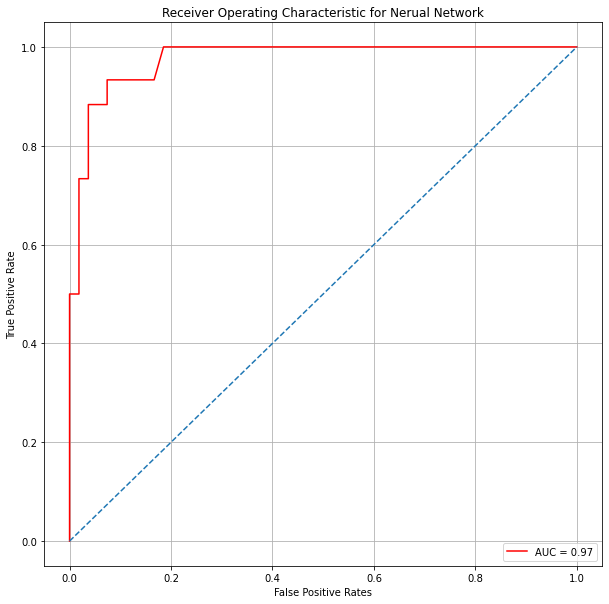

In [17]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob_nn_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nNerual Network AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))



Confusion Matrix for Nerual Network: 
 [[51  3]
 [ 7 53]]
Accuracy :  0.9122807017543859
Sensitivity :  0.9444444444444444
Specificity :  0.8833333333333333
Precision: 0.946429


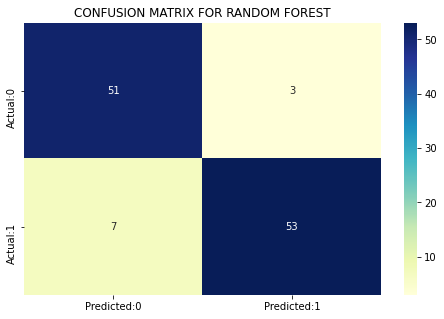

In [18]:


#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_class_nn_1)
print('Confusion Matrix for Nerual Network: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_class_nn_1)
print('Precision: %f' % precision)



#create a confusion matrix to visually display the postive and negative prediction rate
cmrf=confusion_matrix(y_test,y_pred_class_nn_1)
conf_matrixrf=pd.DataFrame(data=cmrf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")
sns.heatmap(conf_matrixrf, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig('cmrfe.png')

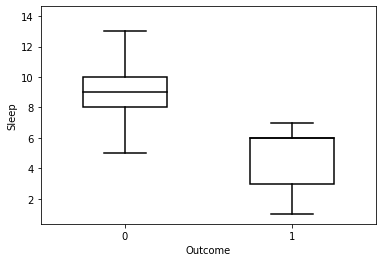

In [19]:
ax = sns.boxplot(x='Outcome', y='Sleep', data=df ,color='white', width=.5, fliersize=0)

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

## 

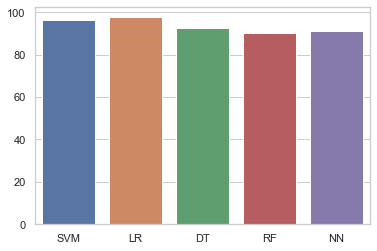

In [37]:
modelName=["SVM","LR","DT","RF","NN"]
model=[svmacc,lracc,dtacc,rfacc,nnacc]

import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=modelName, y=model,  data=tips)



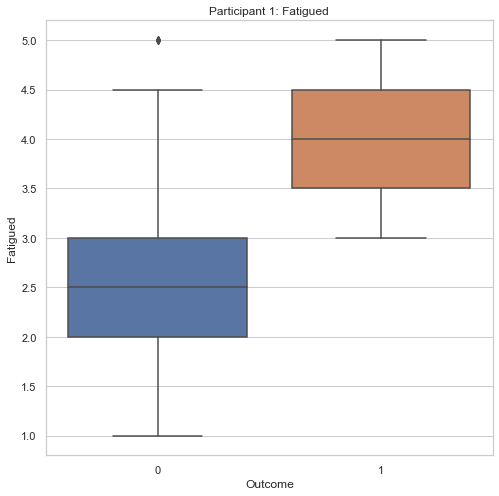

In [39]:
plt.figure(figsize = (8,8))
plt.title("Participant 1: Fatigued")
sns.boxplot(x='Outcome', y='Fatigued', data=df)
plt.savefig('bp.png')